Chapter 08

# 最近质心分类
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid

In [2]:
# import the iris data
iris = datasets.load_iris()

# Only use the first two features: sepal length, sepal width
X = iris.data[:, :2]
y = iris.target

# generate mesh
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Create color maps
rgb = [[255, 238, 255],  # red
       [219, 238, 244],  # blue
       [228, 228, 228]]  # black
rgb = np.array(rgb)/255.

cmap_light = ListedColormap(rgb)
cmap_bold = [[255, 51, 0], [0, 153, 255],[138,138,138]]
cmap_bold = np.array(cmap_bold)/255.

# shrinkage: It "shrinks" each of the class centroids toward 
# the overall centroid for all classes 
# by an amount we call the shrink threshold

C:\Users\james\anaconda3\lib\site-packages\seaborn\_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
C:\Users\james\anaconda3\lib\site-packages\seaborn\_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
C:\Users\james\anaconda3\lib\site-packages\seaborn\_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
C:\Users\james\AppData\Local\Temp\ipykernel_8544\4171249708.py:21: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, levels=[0,1,2], colors=['k'])
C:\Users\james\anaconda3\lib\site-packages\seaborn\_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead

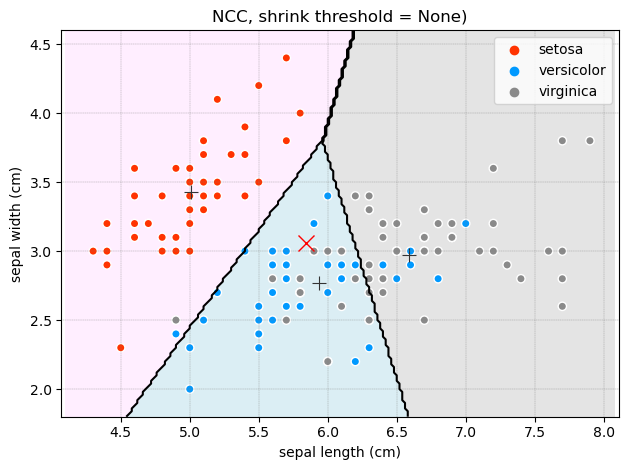

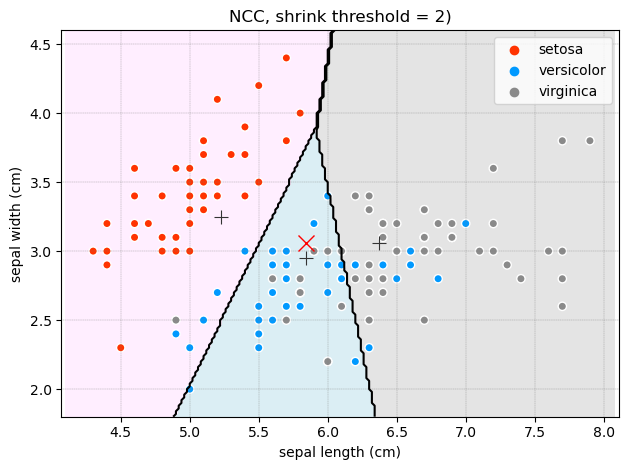

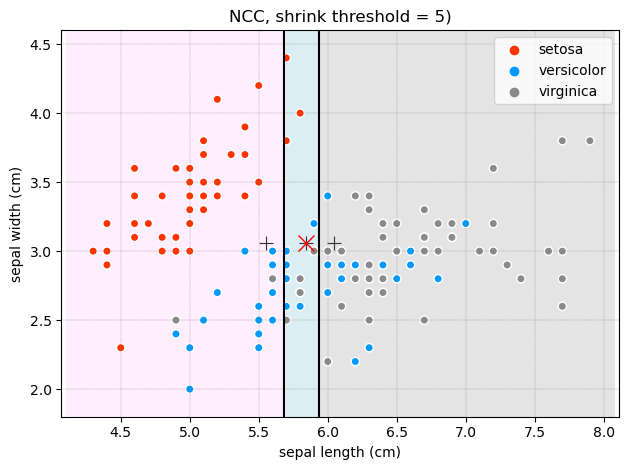

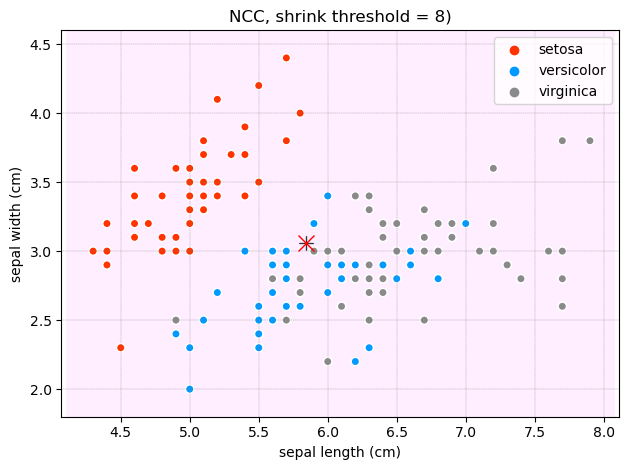

In [3]:
for shrinkage in [None, 2, 5, 8]:

    # Create an instance of Neighbours Classifier and fit the data.
    clf = NearestCentroid(metric='euclidean', shrink_threshold=shrinkage)
    
    # kNN classification, weight = uniform
    clf.fit(X, y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # visualization
    fig, ax = plt.subplots()
    
    # plot decision regions
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    
    # plot decision boundaries
    plt.contour(xx, yy, Z, levels=[0,1,2], colors=['k'])
    
    # Plot data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, 
                    linewidth = 1, edgecolor=[1,1,1])

    # Plot the centroid of each class
    centroids = clf.centroids_;

    sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1],
                    color=".2", marker="+", s=100)
    
    # calculate the centroid of all sample data
    data_center_x1 = np.mean(X[:, 0]);
    data_center_x2 = np.mean(X[:, 1]);
    
    # plot the centroid of all sample data
    plt.plot(data_center_x1,data_center_x2,
             marker="x", color = 'r', markersize=12)
    
    # Figure decorations
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("NCC, shrink threshold = %r)"
              % shrinkage)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
    plt.tight_layout()
    plt.axis('equal')
plt.show()